<a href="https://colab.research.google.com/github/sainirajesh17/Global_Terrorism_Analysis_EDA/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> GLOBAL TERRORISM DATABASE </b>


## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

## <b> 1.  Getting the data ready for Classification </b>


In [ ]:
# We will start with importing some important libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [ ]:
# Mounting the Drive
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required data from the drive

file_path = "/content/drive/MyDrive/EDA - Global Terrorism Analysis/Global Terrorism Data.csv"
terrorism_data = pd.read_csv(file_path, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Checking the data with the head method
 
terrorism_data.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
# Checking the columns available in the dataset 

terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# checking the shape of the dataset

terrorism_data.shape

(181691, 135)

In [ ]:
# By the info method we can check the Nan values and the datatype of all the columns in our dataset

terrorism_data.info(verbose= True, null_counts = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

## <b> 2. Cleaning the data

In [ ]:
# Now we have created a new dataset (i.e terrorism_data_new) where we will keep only the columns which we need for the analysis

terrorism_data_new = terrorism_data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city','latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'ransom']]

In [ ]:
# Checking our new updated dataframe

terrorism_data_new.head(2)

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
# Now checking the shape of the new dataframe

terrorism_data_new.shape

(181691, 16)

In [ ]:
# Now we will rename our columns in the new dataframe

terrorism_data_new = terrorism_data_new.rename(columns= {'iyear' : 'year','imonth' : 'month', 'iday' : 'day', 'country_txt' : 'country', 'region_txt' : 'region', 'provstate' : 'state', 'attacktype1_txt' : 'attack_type', 'targtype1_txt' : 'target_type', 'gname' : 'gang_name', 'weaptype1_txt' : 'weapon_type', 'nkill' : 'no_of_kills'  })

In [ ]:
# Checking that the columns are renamed

terrorism_data_new.head(2)

,year,month,day,country,region,state,city,latitude,longitude,success,attack_type,target_type,gang_name,weapon_type,no_of_kills,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,1.0


In [ ]:
# Now we will check the info of the new dataset

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  171378 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Handeling the Nan values using the fillna method
 
terrorism_data_new['state'] = terrorism_data_new['state'].fillna('unknown')
terrorism_data_new['city'] = terrorism_data_new['city'].fillna('unknown')
terrorism_data_new['no_of_kills'] = terrorism_data_new['no_of_kills'].fillna(0)


In [ ]:
# checking for the Nan values

terrorism_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181691 non-null  object 
 6   city         181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   success      181691 non-null  int64  
 10  attack_type  181691 non-null  object 
 11  target_type  181691 non-null  object 
 12  gang_name    181691 non-null  object 
 13  weapon_type  181691 non-null  object 
 14  no_of_kills  181691 non-null  float64
 15  ransom       77381 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [ ]:
# Now we will check the sum of the Nan values present in all of the columns

terrorism_data_new.isnull().sum()


year                0
month               0
day                 0
country             0
region              0
state               0
city                0
latitude         4556
longitude        4557
success             0
attack_type         0
target_type         0
gang_name           0
weapon_type         0
no_of_kills         0
ransom         104310
dtype: int64

## <b> 3. Exploratory Data Analysis </b>

## <b> 3.1 Visualising the hot zones under attack over the world *******

## <b> 3.2 Total number of attacks in every year by region


In [ ]:
attacks_per_year = terrorism_data_new.groupby(['year', 'region']).count().unstack()['country']
attacks_per_year

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1.0,7.0,NaN,2.0,12.0,28.0,472.0,65.0,1.0,10.0,3.0,50.0
1971,1.0,5.0,NaN,1.0,5.0,55.0,247.0,24.0,NaN,6.0,2.0,125.0
1972,8.0,3.0,NaN,NaN,1.0,53.0,73.0,33.0,1.0,16.0,4.0,376.0
1973,1.0,6.0,NaN,2.0,1.0,19.0,64.0,83.0,1.0,2.0,4.0,290.0
1974,1.0,11.0,NaN,4.0,2.0,42.0,111.0,81.0,2.0,3.0,7.0,317.0
1975,NaN,9.0,NaN,12.0,NaN,44.0,159.0,55.0,4.0,7.0,12.0,438.0
1976,NaN,45.0,NaN,2.0,NaN,55.0,125.0,91.0,4.0,12.0,11.0,578.0
1977,NaN,24.0,NaN,4.0,2.0,211.0,149.0,119.0,2.0,8.0,29.0,771.0
1978,2.0,199.0,NaN,35.0,2.0,128.0,117.0,222.0,2.0,44.0,46.0,729.0


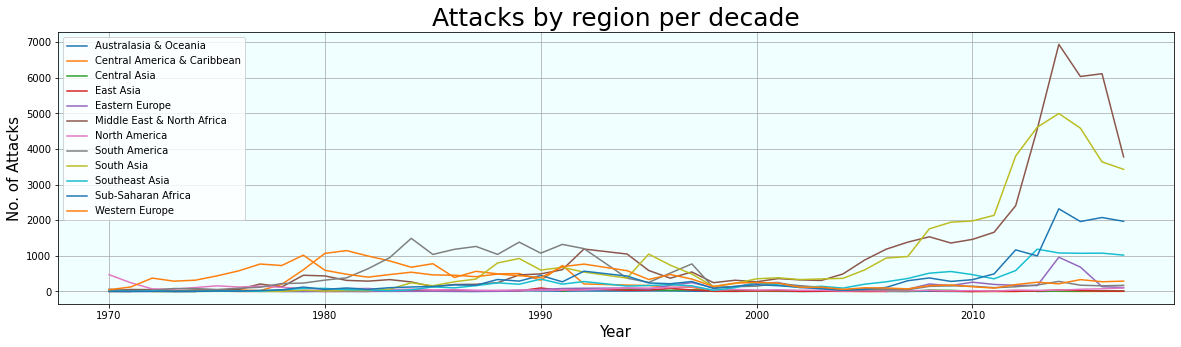

In [ ]:
# Plotting the Multiline Chart (subplot by decade)
attacks_per_year.plot(grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the chart.
plt.title('Attacks by region per decade', fontsize = 25)

# Set the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# show a legend on the plot
plt.legend()

## Conclusion :- From the above graph we can conclude that after the year 2010 their is a hude spike in the terrorist attacks.

## <b> 3.3 Analysing the trend across the year

In [ ]:
yearly_trend = terrorism_data_new.year.value_counts().sort_index(ascending=True)
yearly_trend

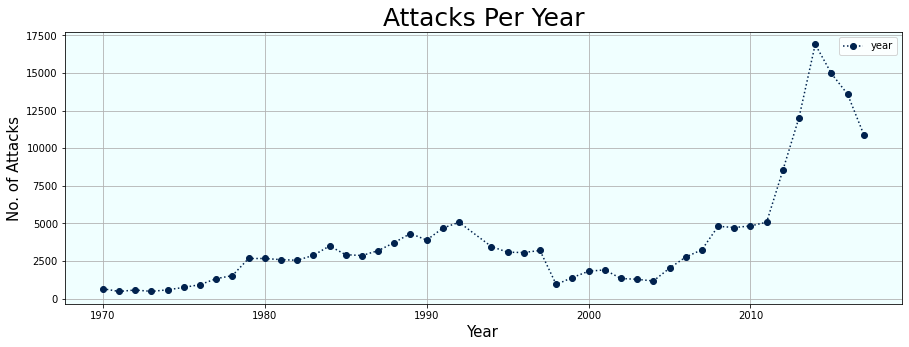

In [ ]:
# Plotting the line Chart to show the trend.
yearly_trend.plot(kind = 'line', marker = 'o', ls = ':', grid = True, colormap = "cividis").patch.set_facecolor('#f0ffff')

# Set a title of the chart.
plt.title('Attacks Per Year', fontsize = 25)

# Set the x and y axis labels
plt.ylabel('No. of Attacks', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()

## <b> In the above graph it is visible that for year 2014 their where most terrorist attack so analysing which region got attacked most

In [ ]:
attacks_in_2014 = terrorism_data_new[terrorism_data_new['year'] == 2014]
attack_2014 = attacks_in_2014['region'].value_counts().to_frame()

ValueError: ignored

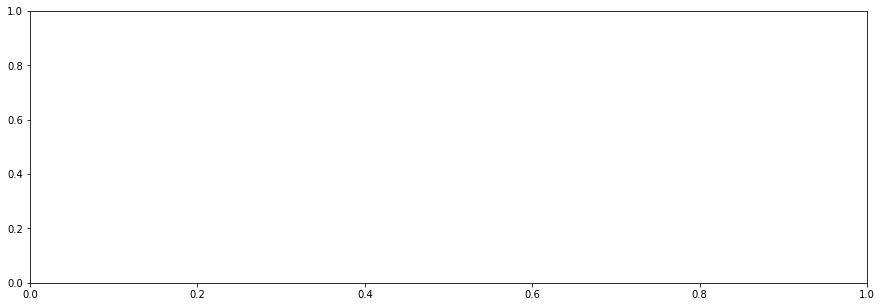

In [ ]:
# Plotting the line Chart to show the trend.

attack_2014.plot(kind = 'barh',color = palette, grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the chart.
plt.title('Attacks in year 2014 per region', fontsize = 25)

# Set the x and y axis labels
plt.ylabel('Region', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (15, 5)

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()

## <b> Top 10 countries which where most attacked

In [ ]:
top_10_countries = terrorism_data_new['country'].value_counts().head(10)
top_10_countries

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country, dtype: int64

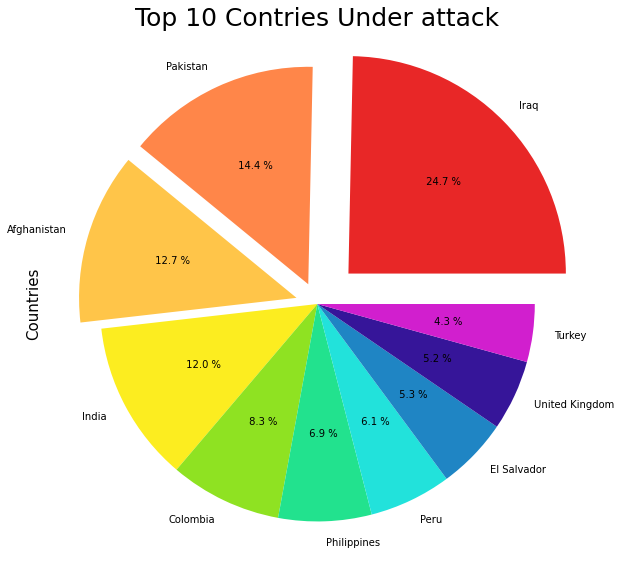

In [ ]:
# Defining the explode
myexplode = [0.2, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0 ]
color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]

# Plotting the Pie Chart
top_10_countries.plot(kind = 'pie', explode = myexplode,autopct ='% 1.1f %%',colors = color_set)

# Set a title of the chart.
plt.title('Top 10 Contries Under attack', fontsize = 25)

# Set the y label
plt.ylabel('Countries', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Display a figure.
plt.show()

## <b> Top 10 states under attack

In [ ]:
top_10_states = terrorism_data_new['state'].value_counts().head(10)

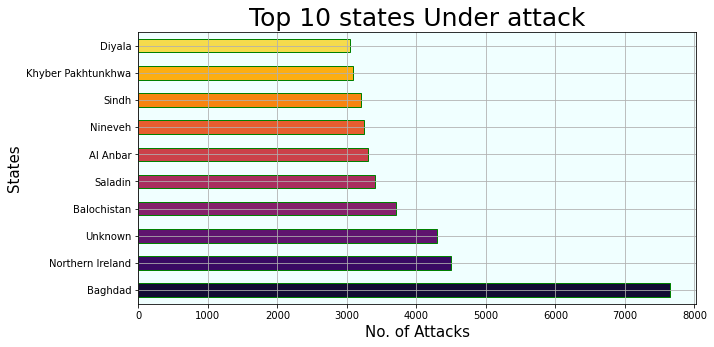

In [ ]:
# Plotting the horizontal Bar graph

palette = sns.color_palette("inferno", 10).as_hex()
top_10_states.plot(kind = 'barh', color= palette, edgecolor='green', grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Top 10 states Under attack', fontsize = 25)

# Set the x and y axis label
plt.xlabel('No. of Attacks', fontsize = 15)
plt.ylabel('States', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Display a figure.
plt.show()

## <b>  Which attack type is the most common

In [ ]:
common_attack_type = terrorism_data_new['attack_type'].value_counts()

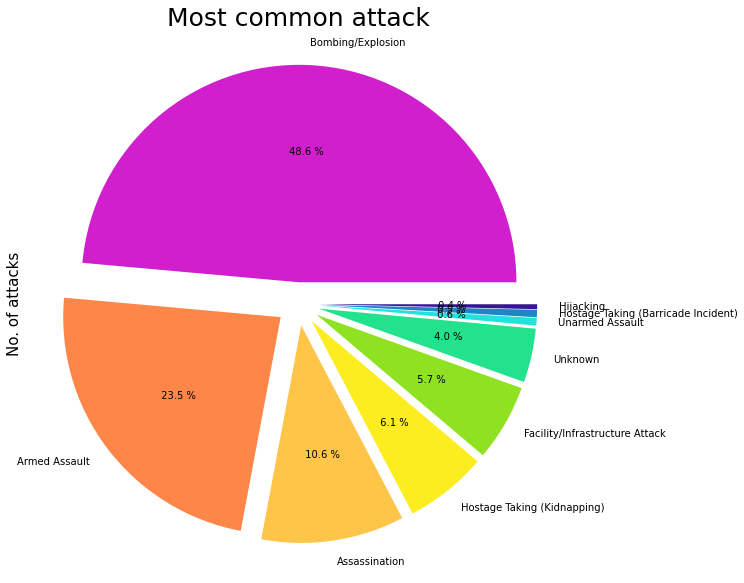

In [ ]:
# Defining the explode
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 ]
color_set = ["#d11fce","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599"]

# Plotting the Pie Chart
common_attack_type.plot(kind = 'pie', explode = myexplode, autopct ='% 1.1f %%', colors = color_set)

# Set a title of the chart.
plt.title('Most common attack', fontsize = 25)

# Set the y label
plt.ylabel('No. of attacks', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Display a figure.
plt.show()

## <b> Which gang attacked the most <b>

In [ ]:
leading_gangs = terrorism_data_new['gang_name'].value_counts().head(10)

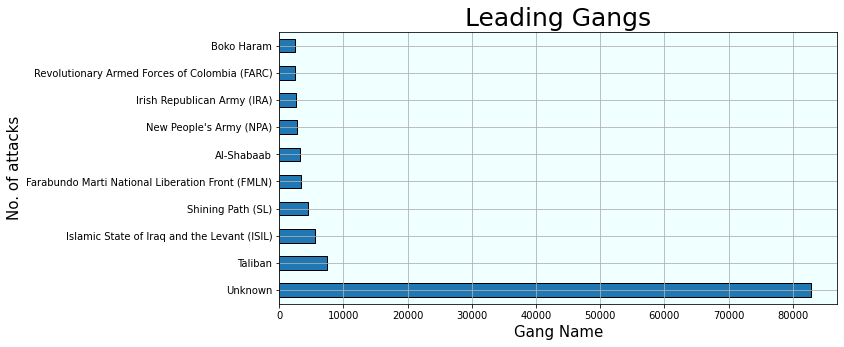

In [ ]:
# Plotting the horizontal Bar graph
leading_gangs.plot(kind = 'barh', edgecolor='black', grid = True).patch.set_facecolor('#f0ffff')

# Set a title for our chart
plt.title('Leading Gangs', fontsize = 25)

# Set the x and y axis label
plt.xlabel('Gang Name', fontsize = 15)
plt.ylabel('No. of attacks', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Display a figure.
plt.show()

## <b> which attack type is used by the most deadly gang :- Taliban

In [ ]:
# Installing the needed library

!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
gname = "Taliban"
def treeplot(data,gang_name):
    plt.subplots(figsize=(10, 10))
    w_t = pd.DataFrame(terrorism_data_new[terrorism_data_new['gang_name']==gname]['weapon_type'].value_counts())
    w_t.reset_index(level=0,inplace=True)
    t = squarify.plot(sizes=w_t["weapon_type"],label=w_t["index"],alpha=0.8)
    plt.show()

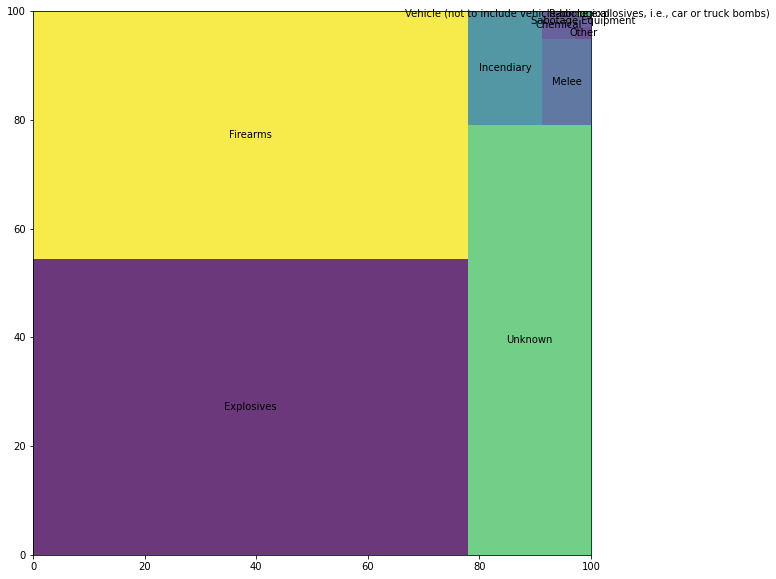

In [ ]:
# Plotting the Heat Map
treeplot(terrorism_data_new,"Taliban")

## Conclusion :- Firearms and Explovies have been Taliban's favorite weapon type. This has been same for many terrorist groups.


## <b> What was the most common target of the terrorist <b>

In [ ]:
common_targets = terrorism_data_new['target_type'].value_counts().head(10)

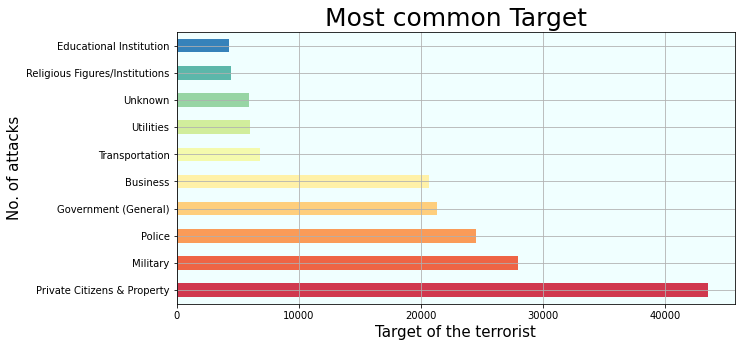

In [ ]:
# Plotting the horizontal Bar graph
palette = sns.color_palette("Spectral", 10).as_hex()

common_targets.plot(kind = 'barh',color = palette , grid = True).patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Most common Target', fontsize = 25)

# Set the x and y axis label
plt.xlabel('Target of the terrorist', fontsize = 15)
plt.ylabel('No. of attacks', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Display a figure.
plt.show()

## Conclusion :- The most common target of the Terrorist are the 'Private Citizens & Property' 

## <b> Which year has the most number of casualties

In [ ]:
casualties = terrorism_data_new.groupby('year').sum()['no_of_kills']

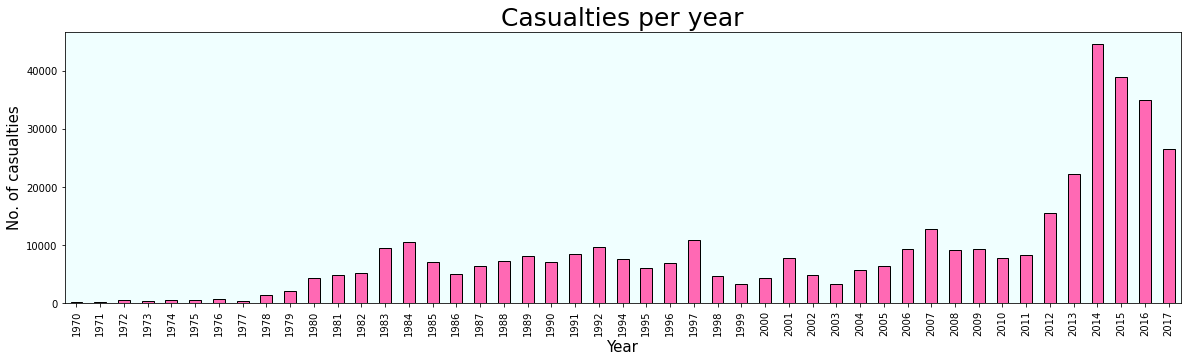

In [ ]:
# Plotting the Bar graph
casualties.plot(kind = 'bar', color = 'hotpink', edgecolor='black').patch.set_facecolor('#f0ffff')

# Set a title of the current axes.
plt.title('Casualties per year', fontsize = 25)

# Set the x and y axis label
plt.ylabel('No. of casualties', fontsize = 15)
plt.xlabel('Year', fontsize = 15)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# Display a figure.
plt.show()

## Conclusion :- From the above graph in the year 2014 has the most number of casualties

## <b> success v/s failed attacks country wise

In [ ]:
attacks = terrorism_data_new.groupby(['success','region']).count()['attack_type'].unstack()
attacks

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
success,,,,,,,,,,,,
0,42,365,58,122,707,6155,562,1358,5605,1334,1273,2478
1,240,9979,505,680,4437,44319,2894,17620,39369,11151,16277,14161


In [ ]:
succ_attacks = attacks[attacks['success'] == 0]
x1 = succ_attacks.region.to_list()
y1 = succ_attacks.attack_type.to_list()

In [ ]:
succ_attacks = succ_attacks.loc[:,['region', 'attack_type']]

In [ ]:
succ_attacks.plot(kind = 'line')

In [ ]:
fail_attacks = attacks[attacks['success'] == 1]
x2 = fail_attacks.region.to_list()
y2 = fail_attacks.attack_type.to_list()

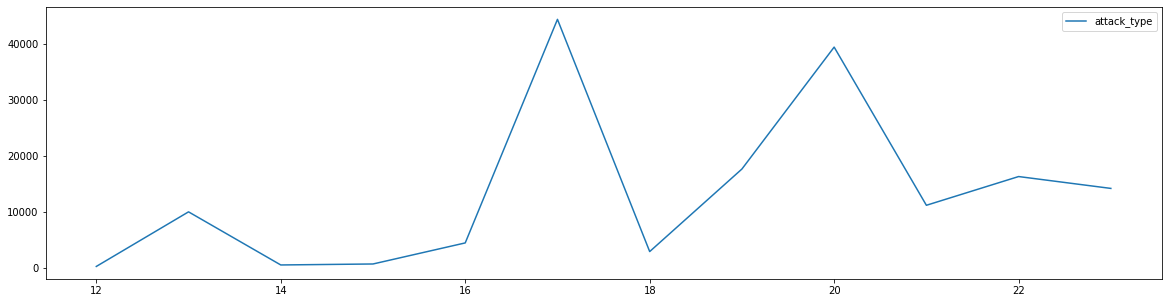

In [ ]:
fail_attacks = fail_attacks.loc[:,['region', 'attack_type']]
fail_attacks.plot()

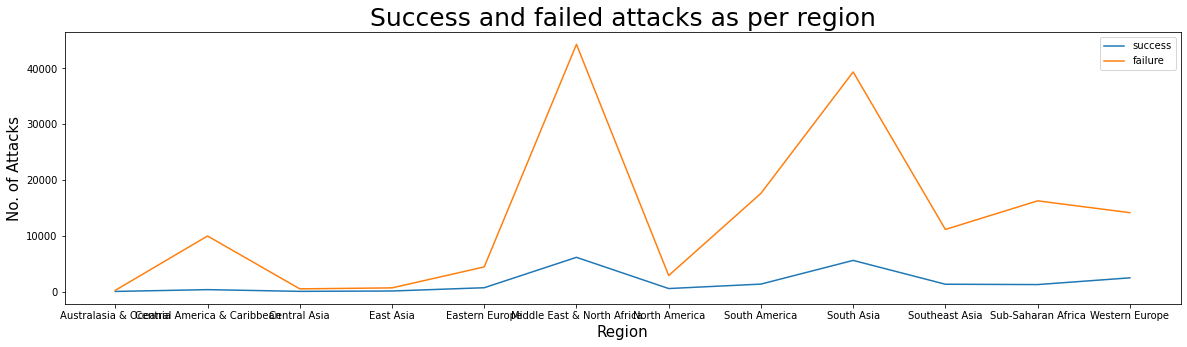

In [ ]:
# plotting the success points
plt.plot(x1, y1, label = "success")

# plotting the failure points
plt.plot(x2, y2, label = "failure")

# Set the x and y axis label
plt.xlabel('Region', fontsize = 15)
plt.ylabel('No. of Attacks', fontsize = 15)

# Set a title of the current axes.
plt.title('Success and failed attacks as per region', fontsize = 25)

# Setting the figure size
plt.rcParams['figure.figsize'] = (20, 5)

# show a legend on the plot
plt.legend()

# Display a figure.
plt.show()

In [ ]:
x = terrorism_data_new.groupby(['year']).count()['region']
x = terrorism_data_new.groupby(['region']).count()['year']

In [ ]:
print(x)

region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: year, dtype: int64


## <b> Why most dangerous country is most dangerous ***** </b>

---




## 5. Challenges
The dataset countains huge number of classes (3,453) and the frequency of each class ranged from 1 to about 6,575; which lead to removal of few classes that had frequency less than a particular number. This clipping has to be done by setting "class_freq [threshold] = 11" i.e., classes with frequency less than 11 are removed. Decreasing this number will lead to better classification results. It was necessary to come up with a number that can include as much number of classes yet provide better and acceptable classification results.

The "Folium" API is used for chloropleth world map. The way it works is, it maps the country names with its corresponding geographic shape written in JSON, and then assigns the intensity of color with variable (number of kills, number of attacks etc). In order to make the mapping it was necessary to make sure that country text in the databse match with that of API. There were certain countries which had different names, for example : The database had "United States" but the API had "United States of America"; database had "East Germany", "West Germany" which in today's date are known as "Germany" so API had only "Germany". So these kind of data irregularities were resolved manually looking for each match in database and API.

## 6. Future Work
As discussed in Section 3., we can use a neural network that penalizes the misclassified classes, so that it can capture and learn the rare classes as well.

Given that we have learned the activities by almost all terrorist groups, can we predict the next move of such groups at given time and location? Such a task will require rigorous time series analysis and maybe more attributes to learn, like weather conditions, government body, economic status etc.

In [ ]:
## <b> analysing the trend of the most attacked region i.e middle east & north africa by decade ****

#terrorism_data_new['region'] == 'Middle East & North Africa'

#trend = terrorism_data_new[terrorism_data_new['region'] == 'Middle East & North Africa']['year']

# Set a title of the chart. #, fontsize = 25
# Set the x and y axis labels , fontsize = 15
# Setting the figure size

## <b> analysing the trend of the most attacked region i.e middle east & north africa by decade ****

In [ ]:
#color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]
